In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore,boxcox
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge,ElasticNet,SGDClassifier,SGDRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import r2_score,accuracy_score,mean_squared_error,mean_absolute_error,confusion_matrix,classification_report,roc_auc_score,roc_curve,f1_score,precision_score,recall_score
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import SVC,SVR
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier,AdaBoostRegressor,AdaBoostClassifier,RandomForestRegressor,RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder
from pandas.api.types import is_string_dtype,is_numeric_dtype
import joblib as joblib
from sklearn.decomposition import PCA


In [115]:
df=pd.read_csv('Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [117]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

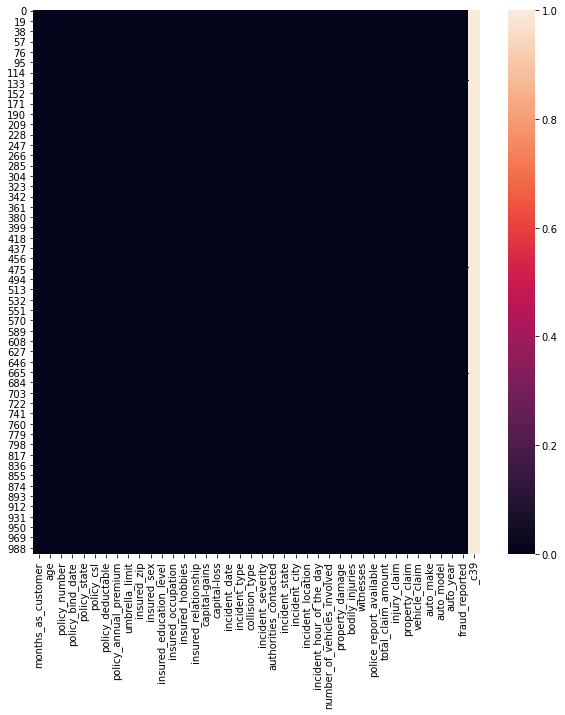

In [118]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.isna())

In [119]:
#column C39 has missing value .Lets drop the column
df=df.drop('_c39',axis=1)

In [120]:
df.isin(['?']).sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [121]:
#few columns having ? .Lets replace it by mode
for col in df.columns:
    if(is_string_dtype(df[col])):
        imputer=SimpleImputer(missing_values='?',strategy='most_frequent')
        df[col]=imputer.fit_transform(df[[col]]).ravel()
    


In [122]:
df.isin(['?']).sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [123]:
#convert string data to numeric
for col in df.columns:
    if(is_string_dtype(df[col])):
        labelencoder=LabelEncoder()
        df[col]=labelencoder.fit_transform(df[col])


In [124]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                 int32
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_date                    int32
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_location                int32
incident_hour_of_the_day 

In [125]:
x=df.drop('fraud_reported',axis=1)
y=df['fraud_reported']

In [126]:
pca=PCA(10)
x=pca.fit_transform(x)
x
standardScaler=StandardScaler()
x=standardScaler.fit_transform(x)
x

array([[-0.47951141, -0.09203755, -0.47591327, ...,  1.44991168,
        -0.27642407,  1.79161785],
       [ 1.69789539, -0.80689467, -0.46357328, ..., -0.05741357,
         1.45846854,  0.42320328],
       [ 1.69802013,  0.53475297, -1.00609823, ..., -0.83580815,
         1.39457058,  0.69025883],
       ...,
       [ 0.82713422,  1.44075054, -0.83873601, ..., -0.09811836,
        -0.93695548,  0.843892  ],
       [ 1.69795955, -0.06392567, -0.85358079, ..., -0.12017392,
         1.53172913,  0.28771813],
       [-0.47942307,  0.04394852,  1.58214968, ...,  0.06153224,
        -0.14436889, -1.57689823]])

In [127]:
lr_reg=LogisticRegression()
svr=SVC()
dtree_reg=DecisionTreeClassifier()
kn_reg=KNeighborsClassifier()
sgd_reg=SGDClassifier()
gradient_reg=GradientBoostingClassifier()
ada_reg=AdaBoostClassifier()
rand_reg=RandomForestClassifier()
gaussian_nb=GaussianNB()

In [128]:
models=[]
models.append(('Logistic Regression',lr_reg))
models.append(('SVC',svr))
models.append(('DecisionTreeClassifier',dtree_reg))
models.append(('KNeighborsClassifier',kn_reg))
models.append(('SGDClassifier',sgd_reg))
models.append(('Gradient Boost Classifier',gradient_reg))
models.append(('Ada Boost Classifier',ada_reg ))
models.append(('RandomForestClassifier',rand_reg))
models.append(('GaussianNB',gaussian_nb))

In [129]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [130]:
#finding and storing matrix model wise
cross_val_list=[]
accuracy_list=[]
model_name_list=[]
roc_auc_score_list=[]
f1_score_list=[]
precission_score_list=[]
recall_score_list=[]

for reg_name,reg_obj in models:
    reg_obj.fit(x_train,y_train)
    y_pred=reg_obj.predict(x_test)
    cross_val_list.append(cross_val_score(reg_obj,x,y,cv=10,scoring='accuracy').mean())
    accuracy_list.append(accuracy_score(y_test,y_pred))
    model_name_list.append(reg_name)
    

In [131]:
df_matrix=pd.DataFrame({'Estimator_Name':model_name_list,'cross_val_Score':cross_val_list,'accuracy_score':accuracy_list})
df_matrix

,Estimator_Name,cross_val_Score,accuracy_score
0,Logistic Regression,0.751,0.725
1,SVC,0.752,0.725
2,DecisionTreeClassifier,0.662,0.655
3,KNeighborsClassifier,0.696,0.680
4,SGDClassifier,0.662,0.715
5,Gradient Boost Classifier,0.738,0.705
6,Ada Boost Classifier,0.710,0.685
7,RandomForestClassifier,0.732,0.720
8,GaussianNB,0.730,0.685


In [133]:
#Logistic Reg working better
lr_reg.fit(x_train,y_train)
y_pred=lr_reg.predict(x_test)
print('score',lr_reg.score(x_train,y_train))
print('accuracy_score',accuracy_score(y_test,y_pred))
print('confusion_matrix \n',confusion_matrix(y_test,y_pred))
print('classification_report',classification_report(y_test,y_pred))

score 0.7575
accuracy_score 0.725
confusion_matrix 
 [[144   1]
 [ 54   1]]
classification_report               precision    recall  f1-score   support

           0       0.73      0.99      0.84       145
           1       0.50      0.02      0.04        55

    accuracy                           0.73       200
   macro avg       0.61      0.51      0.44       200
weighted avg       0.66      0.72      0.62       200



In [134]:
#save the model
joblib.dump(lr_reg,'Auto_Insurance_Fraud.pkl')

['Auto_Insurance_Fraud.pkl']